In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.integrate import quad
from math import log, exp, sqrt, pow
from matplotlib import rc
from matplotlib.colors import LogNorm
from scipy import interpolate

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

# constants
pi = 3.14159265359
alpha = 1 / 137.035999084  # fine structure constant
me = 510998.950  # e- mass [eV]
Mpl = 2e27  # planck mass [eV]
zeta3 = 1.202056903159594  # Riemann zeta(3)
amu = 931.494e6  # amu in eV

# conversion factors
s2eV = 6.582119569e-16  # Hz to eV
J2eV = 1.0 / 1.602176634e-19  # Joules to eV (1 / e)
m2eV = 1.973269804e-7  # m-1 to eV
K2eV = 8.617333262e-5  # Kelvin to eV
kg2eV = 5.609588604e35
T2eV = 2e2 # Tesla to eV2 conversion [eV2/T]
G2eV = 2e-2 # Gauss to eV2 conversion [eV2/G]

In [2]:
# load the AGSS09 solar model data
# the AGSS09 data come from https://web.archive.org/web/20220616154019/https://wwwmpa.mpa-garching.mpg.de/~aldos/SSM/AGSS09/model_agss09.dat
# gaunt factor z1/z2 come from https://bitbucket.org/Jacetoto/bremsstrahlung/src/master/Database-th/
# the energy-dependent photoelectric cross section is getted by digitizing the figure

# file = "/home/yuangw/Documents/GitHub/Chameleons/2406.01691/data/"
file = "/Users/yuangw/Documents/GitHub/chameleons/2406.01691/data/"
r = np.loadtxt(file + "r.dat")  # radial distance [eV-1]
T = np.loadtxt(file + "T.dat")  # solar temperature [eV]
rho = np.loadtxt(file + "rho.dat")  # solar density [eV4]
ne = np.loadtxt(file + "ne.dat")  # electron number density [eV3]
nbar = np.loadtxt(file + "nbar.dat")  # Z2-summed number density [eV3]
nbar2 = np.loadtxt(file + "nbar2.dat")  # Z2-summed number density minus electrons [eV3]
wp = np.loadtxt(file + "wp.dat")  # plasma frequency [eV]
nH = np.loadtxt(file + "nH.dat")  # H number density [eV3]
nHe3 = np.loadtxt(file + "nHe3.dat")  # He3 number density [eV3]
nHe4 = np.loadtxt(file + "nHe4.dat")  # He4 number density [eV3]


# Define the interpolation functions for the solar model data vs. radius in [eV]
rho_r = interpolate.interp1d(r, rho, fill_value=(0.0, 0.0), bounds_error=False)
T_r = interpolate.interp1d(r, T, fill_value=(0.0, 0.0), bounds_error=False)
ne_r = interpolate.interp1d(r, ne, fill_value=(0.0, 0.0), bounds_error=False)
wp_r = interpolate.interp1d(r, wp, fill_value=(0.0, 0.0), bounds_error=False)
nbar_r = interpolate.interp1d(r, nbar, fill_value=(0.0, 0.0), bounds_error=False)
nbar2_r = interpolate.interp1d(r, nbar2, fill_value=(0.0, 0.0), bounds_error=False)
nH_r = interpolate.interp1d(r, nH, fill_value=(0.0, 0.0), bounds_error=False)
nHe3_r = interpolate.interp1d(r, nHe3, fill_value=(0.0, 0.0), bounds_error=False)
nHe4_r = interpolate.interp1d(r, nHe4, fill_value=(0.0, 0.0), bounds_error=False)

z1 = np.loadtxt(file + "Z1.dat")  # gaunt factors for Z=1
z2 = np.loadtxt(file + "Z2.dat")  # gaunt factors for Z=2
print('z1',np.shape(z2),np.shape(z1))


z1 (501, 201) (501, 201)


### Primakoff Production from charged particles

Chameleon effective mass:
$$ m_\phi^2(\rho) = n( 1+n)\Lambda^{4+n}(\frac{\beta_m \rho (r)}{n m_{\rm Pl}\Lambda^{4+n}})^{\frac{2+n}{1+n}}$$
The Lagrangian terms relevant for Primakoff production are the following:
$$ \mathcal{L} \supset \frac{-\beta_{\gamma}}{4 M_{\rm Pl}} \phi F_{\mu\nu}F^{\mu\nu} - e A_{\mu}\bar{\psi}\gamma^{\mu}\psi $$
* These allow for production of scalars through the interactions of photons with charged particles (electrons and ions) in the solar plasma, by the process $\gamma + Z e \to Ze + \phi$. (Here,we have ignored the disformal coupling, leaving the study of this production channel for future works.)

The total production rate of scalars/chameleons from Primakoff process is:
$$ \frac{1}{\beta_\gamma^2}\frac{\mathrm{d}\dot N}{\mathrm{d}\omega} = \frac{\alpha}{8\pi M_\mathrm{Pl}^2} \int_0^{R_\odot} \frac{r^2 \mathrm{d}r}{e^{\omega/T} - 1} \frac{\omega^2 k_\phi}{k_\gamma} \mathcal{I}(u,v) \sum_i Z_i^2 n_i  $$
where:
$$ u = \frac{k_\gamma}{2 k_\phi} + \frac{k_\phi}{2 k_\gamma}, \qquad  v = \frac{\kappa^2}{2 k_\gamma k_\phi}  $$
$$ k_\gamma = \sqrt{\omega^2 - m_\gamma^2}, \qquad k_\phi = \sqrt{\omega^2 - m^2}  $$
and the Debye screening scale $\kappa$ satisfy $\kappa^2 = \frac{4 \pi \alpha}{T} \sum_i Z_i^2 n_i$

/var/folders/jg/fgqgnyxs1tlcbr5x6bxs_gl40000gn/T/ipykernel_26435/2612733267.py:43: RuntimeWarning: overflow encountered in exp
  bose = nbarr / (np.exp(w / Tr) - 1)


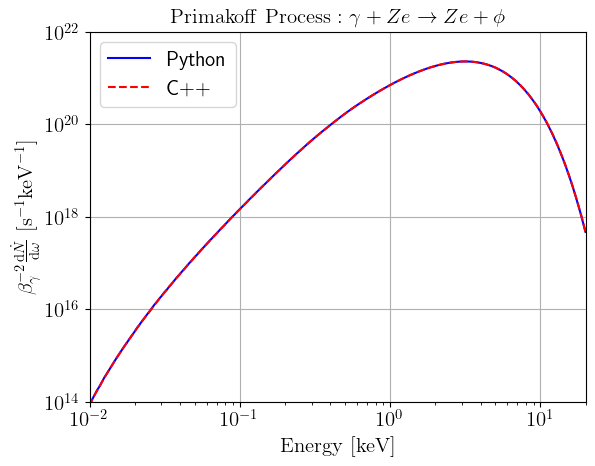

In [ ]:
n=1
E = 2.4e-3   #eV
Bm = 100
rSolar = 6.957e8 / m2eV  # solar radius [eV-1]
radius = rSolar * np.logspace(-2, 0, 200)  # [eV-1]


#chameleon model params n, Bm (matter coupling), assume rho dominated by matter density
def mCham2(r, Bm):  # effective mass square, Eq.18 in 2406.01691
    """Chameleon mass squared as a function of solar radius."""
    E4n = E**(4 + n)
    x = Bm * rho_r(r) / (n * Mpl * E4n)
    x = np.clip(x, 1e-30, None) # set minimum value, avoid log(0) or negative value  
    return n * (n + 1) * E4n * np.power(x, (n + 2) / (n + 1))

# Define curlyI
def curlyI(u, v):
    return (u*u - 1) / v * np.log((u - 1) / (u + 1)) - ((u + v)**2 - 1) / v * np.log((u + v - 1) / (u + v + 1)) - 2

# Define curlyI approximation near u => 1
def curlyIapprox(u, v):
    return u*u / v - (v + 2) * np.log(v / (v + 2)) - 2

def T_integrand(r, w, Bm):
    """Differential scalar production rate on Earth d2N/dw divided by beta_gamma^2"""
    Tr = np.clip(T_r(r), 1e-5, None)  # avoid division by zero
    ner = np.clip(ne_r(r), 1e-5, None)
    nbarr = np.clip(nbar_r(r), 1e-5, None)

    mg2 = 4 * pi * alpha * ner / me
    ms2 = mCham2(r, Bm)
    if w**2 <= mg2 or w**2 <= ms2:
        return 0.0

    K2 = 8 * pi * alpha * nbarr / Tr
    kgamma = np.sqrt(np.abs(w**2 - mg2))
    kphi = np.sqrt(np.abs(w**2 - ms2))
    uArg = kgamma / (2 * kphi) + kphi / (2 * kgamma)
    vArg = K2 / (2 * kphi * kgamma)

    Iuv = curlyI(uArg, vArg) if uArg >= 1.01 else curlyIapprox(uArg, vArg)
    factor = alpha/ (8 * Mpl**2 * pi)
    bose = nbarr / (np.exp(w / Tr) - 1)
    
    kernel = factor * r**2 * bose * w**2 * kphi/ kgamma * Iuv
    return kernel *1e3/s2eV  # factor 1e3/s2eV convert [eV/eV] to [s-1 keV-1]

T_integrand_vec = np.vectorize(T_integrand)

def T_solarIntg(w, Bm):
    """Integrate T_integrand over the solar radius."""
    return np.trapz(T_integrand_vec(radius, w, Bm), radius)  # integrate over radius

w_array = np.logspace(1, 4.3, 200)  # [eV]
spectrum = np.array([T_solarIntg(wi, Bm=100) for wi in w_array])

Pdata = np.loadtxt("/Users/yuangw/Documents/GitHub/chameleons/AGSS09/Primakoff.csv")
Priene, Pri = Pdata[:, 0], Pdata[:, 1]  # Primakoff cross section [eV-1]
Primakoff = interpolate.interp1d(Priene, Pri, fill_value="extrapolate", bounds_error=False)

plt.plot(w_array/1e3, spectrum, color='blue', label='Python')
plt.plot(w_array/1e3, Primakoff(w_array/1e3), color='red', linestyle='--', label='C++')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0.01, 20)
plt.ylim(1e14, 1e22)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'${\rm Energy~[keV]}$', fontsize=15)
plt.ylabel(r'$\beta_\gamma^{-2}\frac{\mathrm{d}\dot N}{\mathrm{d}\omega}~[{\rm s^{-1} keV^{-1}}]$', fontsize=15)
plt.title(r'${\rm Primakoff~Process:~}\gamma + Z e \to Ze + \phi$', fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.savefig('primakoff.pdf')
plt.show()

### Chameleon production in Bulk Magnetic Fields

We integrate over the phase space to obtain the total production rate $\dot{N}$:
$$ \mathrm{d} \dot N = \mathrm{d}V \frac{\mathrm{d}^3k_\phi}{(2\pi)^3} \Gamma_\phi^{\operatorname{prod}} = \mathrm{d}V \frac{\mathrm{d}^3k_\phi}{(2\pi)^3}  (\frac{\beta_\gamma B_\perp}{M_\mathrm{Pl}})^2 \frac{k_\phi^2}{\vert\omega^2 - k_\gamma^2 - \pi_\gamma \vert^2} \frac{\Gamma_\gamma}{e^{\omega/T} -1}  $$
Hence 
$$  \frac{1}{\beta_\gamma^2}\frac{\mathrm{d}\dot N}{\mathrm{d}\omega} \!=\! \frac{2}{\pi M_\mathrm{Pl}^2} \!\int_0^{R_\odot} \!\!\mathrm{d}r \frac{r^2 B_\perp^2(r)}{e^{\omega/T(r)} - 1} \frac{\omega(\omega^2 - m^2)^{3/2}}{(m_\gamma^2 - m^2)^2 \!+\! (\omega \Gamma_\gamma)^2} \Gamma_\gamma  $$
we have assumed the following form:
$$\Gamma_\gamma = \Gamma^{\rm abs}-\Gamma^{\rm pro} = \frac{64\pi^2\alpha^3}{3m_e^2\omega^3} \sqrt{\frac{m_e}{2\pi T}} n_e \left( 1\!-\!e^{-\omega/T} \right)\sum_i Z^2 n_i F_i + \frac{8\pi\alpha^2}{3m_e^2} n_e   $$
where the sum is over all ion species in the Sun, and $F_i$ is the thermally-averaged Gaunt factor for species $i$.

/var/folders/jg/fgqgnyxs1tlcbr5x6bxs_gl40000gn/T/ipykernel_26435/518351412.py:101: RuntimeWarning: overflow encountered in exp
  kernel = 2/(pi * Mpl**2) * r**2 * B**2 * w * np.power(w*w - ms2, 3/2) / ((ms2 - mg2) ** 2.0 + (w*w*G*G)) * G/(np.exp(w/Tr) - 1)


1.1177355220026482e+21


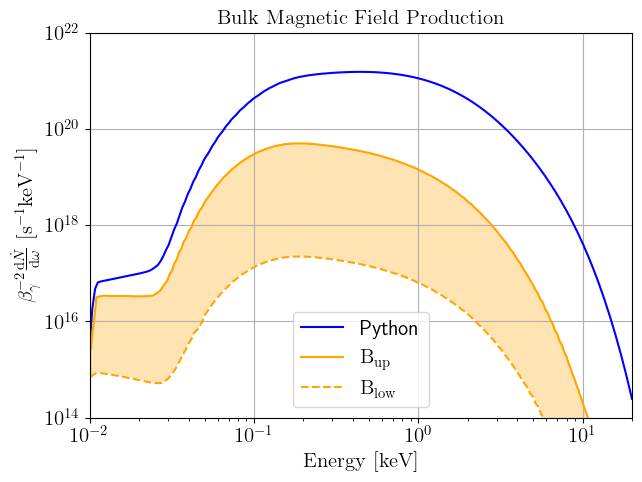

In [ ]:
# solar magnetic field parameters
B0 = 3000 * T2eV  # radiative zone max B [eV2]  200*T2eV;
B1 = 50 * T2eV  # tachocline max B [eV2]  4*T2eV;//
B2 = 3 * T2eV  # or 4, outer region max B [eV2]  3*T2eV;//
Bf = [B0, B1, B2]  # [eV2]

Rrad = 0.712   
Rtach = 0.732   
Rupper = 0.96   
dtach = 0.02   
dupper = 0.035  
radius2 = rSolar * np.linspace(0.001, 1.0, 500)


def Bsolar(rr, B):
    r = rr / rSolar  # radius dimensionless
    if r < Rrad:  # radiative zone
        lam = 10 * Rrad +1
        x = r / Rrad
        return B[0] * (1 + lam) * np.power(1 + 1 / lam, lam) * x**2 * pow(1 - x**2, lam)
    
    elif Rtach - dtach < r < Rtach + dtach: # tachocline
        return B[1] * (1 - ((r - Rtach) / dtach)**2.0)

    elif Rupper - dupper < r < Rupper + dupper: # outer region
        return B[2] * (1 - ((r - Rupper) / dupper)**2.0)

    else:
        return 0.0

    
Bsolar_vec = np.vectorize(lambda r: Bsolar(r, Bf))


def GammaPhoton(r, w, g1, g2):  # absorption-production, paper 2406.01691 Eq.A20

    Tr = np.clip(T_r(r), 1e-10, None)  # avoid division by zero or negative values
    ner = np.clip(ne_r(r), 1e-10, None)
    nHr = np.clip(nH_r(r), 1e-10, None)
    nHe3r = np.clip(nHe3_r(r), 1e-10, None)
    nHe4r = np.clip(nHe4_r(r), 1e-10, None)
    # Tr = T_r(r)
    # ner = ne_r(r)
    # nHr = nH_r(r)
    # nHe3r = nHe3_r(r)
    # nHe4r = nHe4_r(r)

    p1 = 64 * pi**2 * np.power(alpha, 3)
    p2 = 3 * np.power(me, 2) * np.power(w, 3)
    p3 = me * np.power(ner, 2) / (2 * pi * Tr)
    p4 = 1 - np.exp(-w / Tr)
    p5 = 8 * pi * np.power(alpha, 2) * ner / (3 * np.power(me, 2))

    # sum of ion densities
    ions = (nHr * g1) + g2 * (4 * nHe4r + 4 * nHe3r)
    return p1/p2 * np.sqrt(p3) * p4 * ions + p5


####Find the nearest two temperatures T1, T2 in the table that bracket the actual physical temperature T_r(r) at that radius.
####But the table gives Θ = T / mₑ, so to compare with a physical T, you must divide by me when searching
def selectG(r, w):
    """Selects Gaunt factor from matrix and computes Gamma (eV)."""
    indexT1 = indexT2 = indexX1 = indexX2 = 1
    Tr = np.clip(T_r(r), 0, None)  # avoid division by zero
    # Tr = T_r(r)

    # Find indices for temperature interpolation
    for i in range(1, 200):
        if z1[0][i] < Tr/me < z1[0][i + 1]:
            indexT1 = i
        if z2[0][i] < Tr/me < z2[0][i + 1]:
            indexT2 = i

    # Find indices for frequency interpolation
    for i in range(1, 500):
        if (z1[i][0] * Tr) < w < (z1[i + 1][0] * Tr):
            indexX1 = i
        if (z2[i][0] * Tr) < w < (z2[i + 1][0] * Tr):
            indexX2 = i

    g1 = z1[indexX1][indexT1]
    g2 = z2[indexX2][indexT2]
    # print("Tr =", Tr, "IndexX1 =", indexX1, "IndexT1 =", indexT1, "g1 =", g1, "g2 =", g2)
    return GammaPhoton(r, w, g1, g2)


def B_integrand(r, w, Bm):  # [eV Bg-2] Eq.7 in paper 2406.01691
    """Differential scalar production rate due to magnetic field."""
    Tr = np.clip(T_r(r), 1e-15, None)  # avoid division by zero
    ner = np.clip(ne_r(r), 1e-15, None)
    # Tr = T_r(r)
    # ner = ne_r(r)
    
    mg2 = 4 * pi * alpha * ner / me
    ms2 = mCham2(r, Bm)
    if w**2 <= mg2 or w**2 <= ms2:
        return 0.0
    
    B = Bsolar_vec(r)
    G = selectG(r, w)
    kernel = 2/(pi * Mpl**2) * r**2 * B**2 * w * np.power(w*w - ms2, 3/2) / ((ms2 - mg2) ** 2.0 + (w*w*G*G)) * G/(np.exp(w/Tr) - 1)
    # print('Magnetic = ', B, 'Gaunt = ', G, 'kernel = ', kernel)
    return 1e3/s2eV *kernel  # factor 1e3/s2eV convert [eV/eV] to [s-1 keV-1]

B_integrand_vec = np.vectorize(B_integrand)

def B_solarIntg(w, Bm):
    """Integrate B_integrand over the solar radius."""
    return np.trapz(B_integrand_vec(radius2, w, Bm), radius2)  # integrate over radius

print(B_solarIntg(1000, Bm=100))

# assert 0

w_array = np.logspace(1, 4.3, 200)  # [eV]
Bspectrum = np.array([B_solarIntg(wi, Bm=100) for wi in w_array])
# print('Bspectrum', Bspectrum)


Bdata1 = np.loadtxt("/Users/yuangw/Documents/GitHub/chameleons/AGSS09/Blow.csv")
Bdata2 = np.loadtxt("/Users/yuangw/Documents/GitHub/chameleons/AGSS09/Bup.csv")
B1x, B1y = Bdata1[:, 0], Bdata1[:, 1]  # bulk magnetic field [eV-1]
Blow = interpolate.interp1d(B1x, B1y, fill_value="extrapolate", bounds_error=False)
B2x, B2y = Bdata2[:, 0], Bdata2[:, 1]  # bulk magnetic field [eV-1]
Bup = interpolate.interp1d(B2x, B2y, fill_value="extrapolate", bounds_error=False)

plt.figure(figsize=(7, 5))
plt.plot(w_array/1e3, Bspectrum, color='blue', label='Python')
plt.plot(B2x, B2y, color='orange', label=r'${\rm B_{up}}$', linestyle='-')
plt.plot(B1x, B1y, color='orange', label=r'${\rm B_{low}}$', linestyle='--')
plt.fill_between(B2x, B2x*0.1, Bup(B2x), color='orange', alpha=0.3)
plt.fill_between(B1x, B1x*0.1, Blow(B1x), color='white')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0.01, 20)
plt.ylim(1e14, 1e22)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'${\rm Energy~[keV]}$', fontsize=15)
plt.ylabel(r'$\beta_\gamma^{-2}\frac{\mathrm{d}\dot N}{\mathrm{d}\omega}~[{\rm s^{-1} keV^{-1}}]$', fontsize=15)
plt.title(r'${\rm Bulk~Magnetic~Field~Production}$', fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.savefig('magnetic.pdf')
plt.show()